# Using K-Means Clustering for Pair Selection in Python


Statistical Arbitrage is one of the most recognizable quantitative trading strategies. Though several variations exist, the basic premise is that despite two securities being random walks, their relationship is not random, thus yielding a trading opportunity. A key concern of implementing any version of statistical arbitrage is the process of pair selection.

In this post we will survey a machine learning technique to address the issue of pair selection. We will seek to identify pairs within the U.S. equity market and then test their feasibility for trading.

# What is K-Means Clustering

K-Means Clustering is a type of unsupervised machine learning that groups data on the basis of similarities. Recall that in supervised machine learning we provide the algorithm with features, or variables that we would like it to associate with labels, or the outcome in which we would like it to predict or classify. In unsupervised machine learning we only provide the model with features and it then "learns" the associations on its own.

K-Means is one technique for finding subgroups within datasets. One difference in K-Means versus that of other clustering methods is that in K-Means, we have a predetermined amount of clusters and some other techniques do not require that we predefine the amount of clusters. The algorithm begins by randomly assigning each data point to a specific cluster with no one data point being in any two clusters. It then calculates the centroid, or mean of these points. The object of the algorithm is to reduce the total within-cluster variation. In other words, we want to place each point into a specific cluster, measure the distances from the centroid of that cluster and then take the squared sum of these to get the total within-cluster variation. Our goal is to reduce this value. The process of assigning data points and calculating the squared distances is continued until there are no more changes in the components of the clusters, or in other words, we have optimally reduced the in cluster variation.

Let's take a look at how K-Means works. 

We will begin by importing our usual data analysis and manipulation libraries. Sci-kit learn offers built-in datasets that you can play with to get familiar with various algorithms. You can take a look at some of the datasets provided by sklearn here:http://scikit-learn.org/stable/datasets/index.html
To gain an understanding of how K-Means works, we're going to create our own toy data and visualize the clusters. Then we will use sklearn's KMeans algorithm to assess it's ability to identify the clusters that we created.

Let's get started!

In [3]:
#importing necessary libraries
#data analysis and manipulation libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning libraries
#the below line is for making fake data for illustration purposes
from sklearn.datasets import make_blobs

Now that we have imported our data analysis, visualization and the make_blobs method from sklearn, we're ready to create our toy data to begin our analysis.

In [4]:
#creating fake data
data=make_blobs(n_samples=500, n_features=8,centers=5, cluster_std=1.5, random_state=201)

In the above line of code, we have created a variable named data and have initialized it using our make_blobs object imported from sklearn. The make blobs object allows us to create and specify the parameters associated with the data we're going to create. We're able to assign the number of samples, or the amount of observations equally divided between clusters, the number of features, clusters, cluster standard deviation, and a random state. Using the centers variable, we can determine the amount of clusters that we want to create from our toy data.

Now that we have initialized our method, let's take a look at our data

In [5]:
#let's take a look at our fake data
data[0] #produces an array of our samples


array([[ -8.71704845,   5.41481685,   0.80079153, ...,  -6.75272811,
         -5.35441615,  -7.54472844],
       [ -6.69742504,  -9.36091046,   4.76952742, ...,   4.50267649,
         -8.65187746,   7.32045219],
       [ -8.24498976,   3.41616552,   0.59957377, ...,  -6.06843425,
         -5.44945023,  -7.63414447],
       ..., 
       [ -6.39216053,  -3.36795039,  10.45021989, ...,  -1.04434723,
         -5.1316052 ,   3.76141109],
       [  6.00389682,   6.66533498,  -3.59987442, ...,  -1.64244834,
          6.9089689 ,  -4.24161932],
       [ 10.55759534,   5.59483822,  -4.07524866, ...,  -1.38497719,
          8.43095575,  -1.08873693]])

Printing data[0] returns an array of our samples. These are the toy data points we created when initializing the n_samples parameter in our make_blobs object. We can also view the cluster assignments we created

In [6]:
#viewing the clusters of our data
data[1]

array([0, 1, 0, 2, 2, 3, 0, 4, 3, 3, 4, 3, 1, 2, 3, 0, 4, 4, 2, 4, 2, 1, 4,
       1, 2, 1, 2, 1, 4, 2, 1, 4, 0, 4, 2, 3, 4, 1, 0, 0, 3, 3, 1, 2, 4, 2,
       4, 3, 1, 3, 1, 4, 0, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0, 3, 4, 4, 2, 2, 4,
       3, 0, 0, 1, 4, 3, 4, 1, 3, 4, 3, 2, 0, 4, 1, 0, 4, 0, 4, 4, 2, 3, 4,
       1, 4, 0, 3, 0, 4, 3, 2, 4, 2, 1, 3, 0, 2, 2, 0, 2, 2, 2, 1, 4, 4, 4,
       2, 2, 0, 2, 0, 4, 2, 1, 0, 3, 0, 2, 2, 3, 2, 0, 1, 2, 1, 0, 2, 1, 0,
       3, 2, 1, 1, 0, 1, 0, 3, 0, 0, 3, 2, 2, 4, 2, 4, 1, 2, 1, 2, 4, 1, 1,
       4, 3, 0, 0, 1, 1, 0, 4, 1, 2, 1, 4, 4, 3, 4, 1, 0, 1, 1, 1, 1, 0, 4,
       4, 4, 1, 0, 4, 3, 4, 2, 2, 4, 3, 3, 1, 3, 0, 3, 0, 0, 4, 1, 4, 3, 3,
       0, 4, 0, 3, 2, 0, 4, 3, 4, 1, 2, 4, 1, 4, 1, 3, 3, 4, 2, 3, 2, 2, 3,
       1, 4, 1, 1, 0, 3, 2, 4, 0, 4, 0, 0, 0, 4, 2, 4, 2, 0, 1, 0, 1, 3, 4,
       4, 4, 3, 1, 4, 1, 4, 2, 4, 3, 0, 1, 3, 1, 3, 0, 0, 2, 3, 0, 1, 2, 1,
       0, 2, 1, 1, 1, 0, 0, 2, 0, 3, 2, 4, 1, 2, 0, 0, 1, 3, 4, 0, 1, 4, 3,
       3, 0,

Printing data[1] allows us to view the clusters created. Note that though we specified five clusters in our initialization, our cluster assignments range from 0 to 4. This is because python indexing begins at 0 and not 1. So cluster counting, so to speak, begins at 0 and continues for five steps. 

We've taken a look at our data and viewed our clusters, but looking at arrays doesn't give us a lot of information. This is where our visualization libraries come in. Python's matplotlib is a great library for visualizing data so that we can make inferences about it. Let's create a scatter plot, or a visual to identify the relationships inherent in our data.

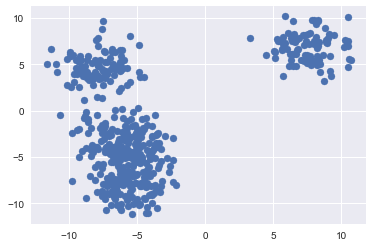

In [7]:
#creating a scatter plot of our data in features 1 and 2
plt.scatter(data[0][:,0],data[0][:,1])

The above plot gives us a little more information. Not to mention it's easier to read. We have created a scatter plot of our sample data using the first two features we created. We can somewhat see that there are some distinct clusters. The group to the upper right of the chart is the most distinct. There is also a degree of separation in the data to the left of the chart. But, didn't we assign five clusters to our data? We can't visually see the five clusters yet, but we know that they're there.

###### One way that we can improve our visualization is to color it by the clusters we created.

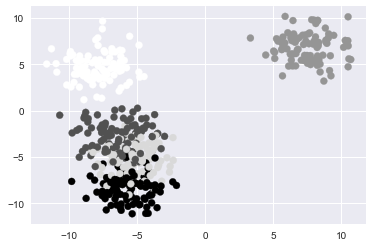

In [8]:
#the above plot doesn't give us much information
#let's recreate it using our clusters
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])

The above plot is a further improvement. We can now see that the grouping to the lower left of our original plot was actually multiple overlapping clusters. What would make this visualization even better is if we added more distinct colors that would  allow us to identify the specific points in each cluster. We can do this by adding another parameter to our scatter plot called cmap. The cmap parameter will allow us to set a color mapping built into matplotlib to recolor our data based on our clusters. To learn more about matplotlib's colormapping you can visit the following link: https://matplotlib.org/examples/color/colormaps_reference.html

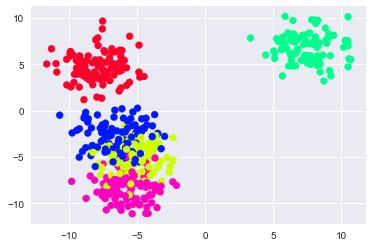

In [15]:
#we can improve the above visualization by adding a color map to our plot
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')

To review, at this point, we have created some toy data using sklearn's built in make_blobs method. We then viewed the rows of the first two features, followed by the actual clusters of our toy data. Next, we plotted our data both with and without coloring based on the clusters. 

To display how K-Means is implemented, we can now create the K-Means object and fit it to our toy data and compare the results.

In [11]:
#importing K-Means
from sklearn.cluster import KMeans


Each time that we import a model in sklearn, to use it, we must create an instance of it. The models are objects and thus we create an instance of the object and specify the parameters for our specific object. Naturally, this allows us to create a variety of different models, each with different specifications for our analysis. In this example we'll create a single instance of the K-Means object and specify the number of clusters.

In [12]:
#instantiating kmeans
model=KMeans(n_clusters=5) #n_clusters represents # of clustrers; we know this because we created this dataset 


In practice, determining the number of clusters isn't so straight foward. However, given the fact that we created this data ourselves, we are aware of how many clusters exist in the data and set the number of clusters for our model to five.

Once we have created an instance of the K-Means algorithm, we are now ready to fit it to our data. During this step, we are applying our model to our data. The model, based on the parameters that we specifiy, will attempt to conform the data to those constraints. Since we set our model's clusters equal to five, by fitting it on our data, our model is going to attempt to create five clusters from our data.

In [16]:
#fitting our KMeans algorithm to our data
model.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In the above line of code, we have now fitted our model to our data. We can see that it confirms the parameters our model applied to our data. Next, now that we have both our toy data and have visualized the clusters we created, we can compare the clusters we created from our toy data to the one's that our K-Means algorithm created based on viewing our data. We'll code a visualization similar to the one we created earlier however, instead of a single plot, we will use matplotlibs subplot method to create two plots, our clusters and K-Means clusters, that can be viewed side by side for analysis. If you would like to learn more about matplotlibs subplot functionality, you can visit the following link: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplot.html

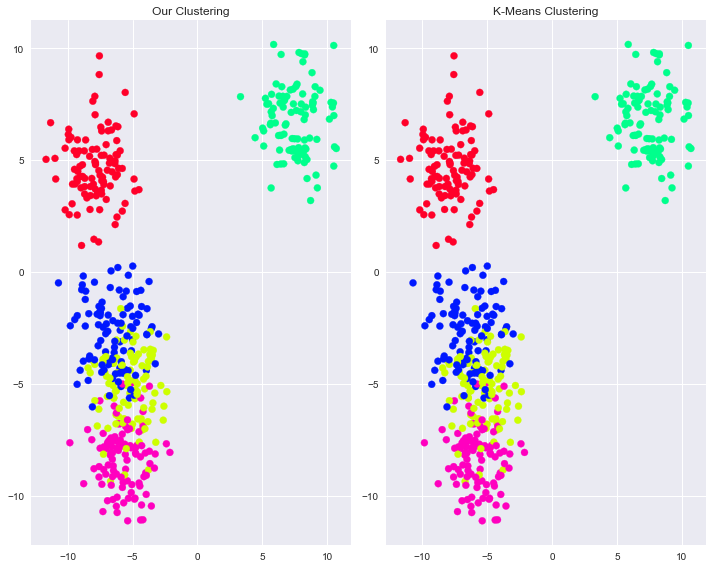

In [17]:
#now we can compare our clustered data to that of kmeans
#creating subplots

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')
#in the above line of code, we are simply replotting our clustered data
#based on already knowing the labels(i.e. c=data[1])
plt.title('Our Clustering')
plt.tight_layout()

plt.subplot(122)
plt.scatter(data[0][:,0],data[0][:,1],c=model.labels_,cmap='gist_rainbow')
#notice that the above line of code differs from the first in that 
#c=model.labels_ instead of data[1]...this means that we will be plotting
#this second plot based on the clusters that our model predicted
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

The above plots show that the K-Means algorithm was able to identify the clusters within our data. The coloring has no bearing on the clusters and is merely a way to distinguish clusters. In practice, we won't have the actual clusters that our data belongs to and thus we wouldn't be able to compare the clusters of K-Means to prior clusters; But what this walkthrough shows is the ability of K-Means to identify the prescense of subgroups within data.

# Life Without K-Means 

So now that we have an understanding of K-Means, let's take a moment to think about why K-Means is even useful for trading. What's the benefit of using K-Means to form subgroups? I mean couldn't we just come up with pairs ourself? 

This is a great question and one undoubtedly you may have wondered about. To better understand the strength of using a technique like K-Means for Statistical Arbitrage, we'll do a walk through of trading a Statistical Arbitrage strategy if there was no K-Means. I'll be your ghost of trading past so to speak.

First let's identify the key components of any Statistical Arbitrage trading strategy.

1) We must identify assets that have a tradable relationship

2) We must calculate the Z-Score of the Spread of these assets, as well as the Hedge Ratio for position sizing.

3) We generate buy and sell decisions when the Z-Score exceeds some upper or lower bound

# The BruteForce Statistical Arbitrage Strategy

To begin we need some pairs to trade. But we can't trade Statistical Arbitrage without knowing whether or not the pairs we select are cointegrated. Cointegration simply means that the statistical properties between our two assets are stable. Even if the two assets move randomly, we can count on the relationship between them to be constant, or atleast most of the time.

Traditionally, when solving the problem of pair selection, in a world with no K-Means, we must find pairs by brute force, or trial and error. This was usually done by grouping stocks together that were merely in the same sector or industry. The idea was that if these stocks were of companies in similar industries, thus having similarities in their operations, their stocks should move similarly as well. But, as we shall see this is not necessarily the case.

The first step is to think of some pairs of stocks that should yield a tradable relationship. We'll use stocks in the S&P 500 but this process could be applied to any stocks within any index. Hmm, how about Walmart and Target. They both are retailers and direct competitors. Surely they should be cointegrated and thus would allow us to trade them in a Statistical Arbitrage Strategy.

Let's begin by importing the necessary libraries as well as the data that we will need. We will use 2014-2016 as our analysis period.

In [18]:
#importing necessary libraries

#data analysis/manipulation
import numpy as np
import pandas as pd
#importing pandas datareader to get our data
import pandas_datareader as pdr
#importing the Augmented Dickey Fuller Test to check for cointegration
from statsmodels.tsa.api import adfuller

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now that we have our libraries, let's get our data.

In [19]:
#setting start and end dates
start='2014-01-01'
end='2016-01-01'

In [20]:
#importing Walmart and Target using pandas datareader
wmt=pdr.get_data_yahoo('WMT',start, end)
tgt=pdr.get_data_yahoo('TGT',start,end)

Before testing our two stocks for cointegration, let's take a look at their performance over the period. We'll create a plot of Walmart and Target.

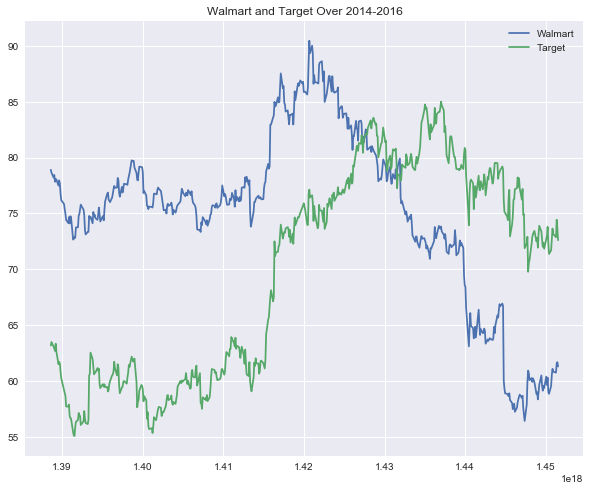

In [27]:
#Creating a figure to plot on 
plt.figure(figsize=(10,8))

#creating WMT and TGT plots
plt.plot(wmt['Close'],label='Walmart')

plt.plot(tgt['Close'],label='Target')
plt.title('Walmart and Target Over 2014-2016')

plt.legend(loc=0)
plt.show()

In the above plot we can see a slight correlation at the beginning of 2014. But this doesn't really give us a clear idea of the relationship between Walmart and Target. To get a definitive idea of the relationship between the two stocks, we'll create a correlation heatmap.

To begin creating our correlation heatmap, must first place Walmart and Target prices in the same dataframe. Let's create a new dataframe for our stocks

In [29]:
#initializing newDF as a pandas dataframe
newDF=pd.DataFrame()
#adding WMT closing prices as a column to the newDF
newDF['WMT']=wmt['Close']
#adding TGT closing prices as a column to the newDF
newDF['TGT']=tgt['Close']

Now that we have created a new dataframe to hold our Walmart and Target stock prices, let's take a look at it.

In [31]:
newDF.head()

,WMT,TGT
Date,,
2014-01-02,78.910004,63.180000
2014-01-03,78.650002,63.490002
2014-01-06,78.209999,63.060001
2014-01-07,78.449997,62.910000
2014-01-08,77.830002,62.689999


We can see that we have the prices of both our stocks in one place. We are now ready to create a correlation heatmap of our stocks. To this, we will use python's Seaborn library. Recall that we imported Seaborn earlier as sns.

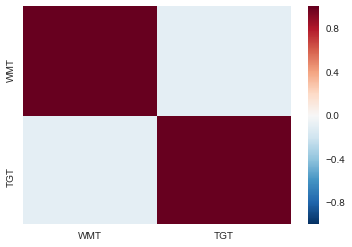

In [33]:
#using seaborn as sns to create a correlation heatmap of WMT and TGT
sns.heatmap(newDF.corr())

In the above plot we called the corr() method on our newDF and passed it into Seaborn's heatmap object. From this visualization we can see that our two stocks are not that correlated. Let's create a final visualization to asses this relationship. We'll use a scatter plot for this.

Earlier we used Matplotlibs scatter plot method. So now we'll introduce Seaborn's scatter plot method. Note that Seaborn is built on top of Matplotlib and thus matplotlibs functionality can be applied to Seaborn.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


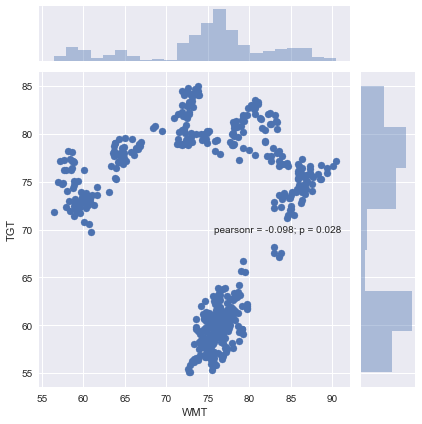

In [38]:
#Creating a scatter plot using Seaborn
plt.figure(figsize=(15,10))
sns.jointplot(newDF['WMT'],newDF['TGT'])
plt.legend(loc=0)
plt.show()

One feature that I like about using Seaborn's scatter plot is that it provides the Corrleation Coefficient and P-Value. From looking at this pearsonr value, we can see that WMT and TGT were not possitively correlated over the period. Now that we have a better understanding of our two stocks, let's check to see if a tradable relationship exits.

We'll use the Augmented Dickey Fuller Test to determine of our stocks can be traded within a Statistical Arbitrage Strategy. Recall that we imported the adfuller test from the statsmodels.tsa.api package earlier.

To perform the ADF test, we must first create the spread of our stocks. We add this to our existing newDF dataframe.

In [39]:
#adding the spread column to the newDF dataframe
newDF['Spread']=newDF['WMT']-newDF['TGT']

Next we create an instance of the adfuller object and pass in the spread of our two stocks.

In [42]:
#instantiating the adfuller test
adf=adfuller(newDF['Spread'])

We have now performed the ADF test on our spread and need to determine whether or not our stocks are cointegrated. Let's write some logic to determine the results of our test.

In [43]:
#Logic that states if our test statistic is less than 
#a specific critical value, then the pair is cointegrated at that
#level, else the pair is not cointegrated

if adf[0] < adf[4]['1%']:
             print('Spread is Cointegrated at 1% Signficance Level')
elif adf[0] < adf[4]['5%']:
             print('Spread is Cointegrated at 5% Signficance Level')
elif adf[0] < adf[4]['10%']:
             print('Spread is Cointegrated at the 10% Significance Level')
else:
             print('Spread is not Cointegrated')

Spread is not Cointegrated


The results of the Augmented Dickey Fuller Test showed that Walmart and Target were not cointegrated. This is determined by a test statistic that is not less than one of the critical values. If you would like to view the actual print out of the ADF test you can do so by keying adf. In the above example, we use indexing to decipher between the t-statistic and critical values. The statsmodels ADF Test provides you with other useful information such as the p-value. You can learn more about the ADF test here: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

In [45]:
#printing out the results of the adf test
adf

(-0.38706825965317432,
 0.91223562790079438,
 0,
 503,
 {'1%': -3.4434175660489905,
  '10%': -2.5698395516760275,
  '5%': -2.8673031724657454},
 1190.4266834075452)

Okay, let's try one more. Maybe we'll have better luck identifying a tradable relationship in a brute force manner. How about Dollar Tree and Dollar General. They're both discount retailers and look they both even have dollar in their names. Since we've gotten the hang of things, we jump right into the adf test.

Let's first import the data for DLTR and DG

In [46]:
#importing dltr and dg
dltr=pdr.get_data_yahoo('DLTR',start, end)
dg=pdr.get_data_yahoo('DG',start, end)

Now that we've gotten our data, let's add these stocks to our newDF and create their spread.

In [47]:
#adding dltr and dg to our newDF dataframe
newDF['DLTR']=dltr['Close']
newDF['DG']=dg['Close']

#creating the dltr and dg spread as a column in our newDF dataframe
newDF['Spread_2']=newDF['DLTR']-newDF['DG']

We've now added the DLTR and DG stocks as well as their spread to our newDF dataframe. Let's take a quick look at our dataframe.

In [48]:
newDF.head()

,WMT,TGT,Spread,DLTR,DG,Spread_2
Date,,,,,,
2014-01-02,78.910004,63.180000,15.730004,56.400002,61.200001,-4.799999
2014-01-03,78.650002,63.490002,15.160000,56.570000,60.980000,-4.410000
2014-01-06,78.209999,63.060001,15.149998,56.759998,59.610001,-2.850003
2014-01-07,78.449997,62.910000,15.539997,56.590000,59.889999,-3.299999
2014-01-08,77.830002,62.689999,15.140003,56.639999,59.700001,-3.060002


Now that we have Spread_2, or the spread of DLTR and DG, we can create ADF2 or a second ADF test for these two stocks.

In [49]:
#Creating another adfuller instance
adf2=adfuller(newDF['Spread_2'])

We've just run the ADF test on our DLTR and DG spread. We can now repeat our earlier logic to determine if the spread yields a tradable relationship.

In [50]:
if adf2[0] < adf2[4]['1%']:
             print('Spread is Cointegrated at 1% Signficance Level')
elif adf2[0] < adf2[4]['5%']:
             print('Spread is Cointegrated at 5% Signficance Level')
elif adf2[0] < adf2[4]['10%']:
             print('Spread is Cointegrated at the 10% Significance Level')
else:
             print('Spread is not Cointegrated')

Spread is not Cointegrated


To view the complete print out of the ADF2 test, we can call adf2.

In [51]:
adf2

(-1.9620694402101162,
 0.30344784824995258,
 1,
 502,
 {'1%': -3.4434437319767452,
  '10%': -2.5698456884811351,
  '5%': -2.8673146875484368},
 1305.4559226426163)

# Checkpoint Review

At this point in our journey toward better understanding the application and usefulness of K-Means we've created our own clusters from data we created, used the K-Means algorithms to identify the clusters within our toy data, and traveled back in time to a Statistical Arbitrage trading world with no K-Means.

We've learned that K-Means assigns data points to clusters randomly initially and then calculates centroids or mean values. It then calculates the distances within each cluster, squares these, and sums them, to get the sum of squared error. The goals is to reduce this error or distance. The algorithm repeats this process until there is no more in-cluster variation, or put another way, the cluster compositions stop changing.

We also learned that in a Statistical Arbitrage trading world without K-Means, we are left to our own devices for solving the historic problem of pair selection. We've learned that despite two stocks being related on a fundamental level, this doesn't necessarily insinuate that they will provide a tradable relationship.

Ahead, we will enter a Statistical Arbitrage trading world where K-Means is a viable option for solving the problem of pair selection and use the same to implement a Statistical Arbitrage trading strategy.

# Building a Statistical Arbitrage Strategy Using K-Means

To Begin, we need to gather data for a group of stocks. We'll continue using the S&P 500. There are 505 stocks in the S&P 500. We will collect some data for each of these stocks and use this data as features for K-Means. We will then identify a pair within one of the clusters, test it for cointegration using the ADF test, and then build a Statistical Arbitrage trading strategy using the pair.

Let's get starterd!

We'll begin by reading in some data from an Excel File containing the stocks and features will use.

In [61]:
#Importing Our Stock Data From Excel
file=pd.ExcelFile('kmeans_stocks.xlsx')

#Parsing the Sheet from Our Excel file
stockData=file.parse('Example')

Now that we have imported our Stock Data from Excel, Let's take a look at it and see what features we will be using to build our K-Means based Statistical Arbitrage Strategy.

In [62]:
#Looking at the head of our stock data
stockData.head()


,Symbol,Name,Dividend Yield,P/E,EPS,MarketCap,EBITDA
0,MMM,3M Company,2.48,23.17,8.16,112.74,8.70
1,ABT,Abbott Laboratories,2.34,48.03,0.94,77.76,4.59
2,ABBV,AbbVie,4.04,17.55,3.63,101.52,10.95
3,ACN,Accenture plc,1.96,18.37,6.76,77.29,5.66
4,ATVI,Activision Blizzard,0.64,37.55,1.28,36.13,2.14


In [63]:
#Looking at the tail of our stock data
stockData.tail()

,Symbol,Name,Dividend Yield,P/E,EPS,MarketCap,EBITDA
500,YHOO,Yahoo Inc.,NaN,NaN,-0.23,43.74,0.2268
501,YUM,Yum! Brands Inc,2.66,15.83,4.04,22.65,1.9600
502,ZBH,Zimmer Biomet Holdings,0.81,77.53,1.51,23.54,2.8000
503,ZION,Zions Bancorp,0.71,22.75,1.99,9.17,0.0000
504,ZTS,Zoetis,0.79,32.16,1.65,26.11,1.7000


We're going to use the Dividend Yield, P/E, EPS, Market Cap, and EBITDA as the features for creating clusters across the S&P 500. From looking at the tail of our data, we can see that Yahoo doesn't have a Dividend Yield, and is a missing P/E ratio. This brings up a good teaching moment. In the real world, data is not always clean and thus will require that you clean and prepare it so that it's fit to analyze and eventually use to build a strategy. 

In actuality, the data imported has been preprocessed a bit as I've already dropped some unnecessary columns from it. Let's take a moment and think about the process of implementing a machine learning algorithm. 

Let's begin by cleaning up our data a little more. Let's change the index to the Symbols column so that we can associate the clusters with the respective symbols. Also, let's drop the Name column as it serves no purpose.

Before make additional changes to our data, let's make a copy of our original. This is a good practice as we could incur an error later and will be able to reset our implementation if we are working with a copy of the original instead of the original.

In [64]:
#making a copy of our stockdata
stockDataCopy=stockData.copy()

In [65]:
#Dropping the Name column from our stockData
stockDataCopy.drop('Name',inplace=True,axis=1)

It's a good practice to go back and check your data after making changes. Let's take a look at our stockData to confirm that we properly removed the Name column. Also, in the above line of code, we want to be sure that we include inplace=True. The states that the changes will persist on our data.

In [67]:
#Checking the head of our stockData
stockDataCopy.head()

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA
0,MMM,2.48,23.17,8.16,112.74,8.70
1,ABT,2.34,48.03,0.94,77.76,4.59
2,ABBV,4.04,17.55,3.63,101.52,10.95
3,ACN,1.96,18.37,6.76,77.29,5.66
4,ATVI,0.64,37.55,1.28,36.13,2.14


Okay, now that we have properly dropped the Name column, we can change the index of our data to that of the Symbol column.

In [68]:
stockDataCopy.reindex(index=stockDataCopy['Symbol'],columns=stockDataCopy.columns)

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA
Symbol,,,,,,
MMM,NaN,NaN,NaN,NaN,NaN,NaN
ABT,NaN,NaN,NaN,NaN,NaN,NaN
ABBV,NaN,NaN,NaN,NaN,NaN,NaN
ACN,NaN,NaN,NaN,NaN,NaN,NaN
ATVI,NaN,NaN,NaN,NaN,NaN,NaN
AYI,NaN,NaN,NaN,NaN,NaN,NaN
ADBE,NaN,NaN,NaN,NaN,NaN,NaN
AAP,NaN,NaN,NaN,NaN,NaN,NaN
AES,NaN,NaN,NaN,NaN,NaN,NaN


We've reindexed our stockData, but this view isn't exactly what we were expecting. Let's fix this by adding the values back to our columns. We are able to do this because we are working using a copy of our original.

In [70]:
#Adding back the values to our Columns
stockDataCopy['Symbol']=stockData['Symbol'].values
stockDataCopy['Dividend Yield']=stockData['Dividend Yield'].values
stockDataCopy['P/E']=stockData['P/E'].values
stockDataCopy['EPS']=stockData['EPS'].values
stockDataCopy['MarketCap']=stockData['MarketCap'].values
stockDataCopy['EBITDA']=stockData['EBITDA'].values

We've added the data back to our stockDataCopy dataframe. Note in the code above, we were able to this because we could simply port over the values from our original dataframe. Let's take another look at our stock data.

In [71]:
#Viewing the head of our stockDataCopy dataframe
stockDataCopy.head()

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA
0,MMM,2.48,23.17,8.16,112.74,8.70
1,ABT,2.34,48.03,0.94,77.76,4.59
2,ABBV,4.04,17.55,3.63,101.52,10.95
3,ACN,1.96,18.37,6.76,77.29,5.66
4,ATVI,0.64,37.55,1.28,36.13,2.14


It appears that Jupyter Notebook responds differently to reindexing and reassigning values to our dataframe that of the Spyder IDE. We won't worry about this for now, but may need to create a work around in the future. Now we will focus on clustering our data.

We begin by instantiating another K-Means object

In [72]:
stock_kmeans=KMeans()

# Wait, How Do We Find K???

This brings us to another critical component of our strategy development. Recall, in our example of K-Means clustering, we created our own toy data and thus were able to determine how many clusters we would like. When testing the K-Means algorithm, we were able to specify K as 5 because we knew how many clusters it should attempt to create.

However, working with actual data, we are not aware of how many subgroups are actually present in our stock data. This means that we must identify a means of determining the appropriate amount of clusters, or value for K, to use. One such technique is termed the 'elbow' technique. We've mentioned this earlier, but I'll briefly recap. We plot the number of clusters versus the sum of squared errors, or SSE. Where the plot tends to bend, forming an elbow like shape, is the value of the clusters that we should select.

So, what we are tasked with doing, is to create a range of values for K, iterate over that range, and at each iteration fit our stock_kmeans model to our data. We will also need to store our K values and have a way to calculate the distances from the centroids of each iteration so that we can computer our SSE or sum of squared errors.

To find our distances, we'll use scipy. Let's import it now

In [73]:
from scipy.spatial.distance import cdist

If you would like to learn more about the cdist object you can visit the following link:https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html. The distance used in K-Means is the Euclidean distance and this is the one we will use with this method.

Let's create our elbow chart to determine the value for K.

In [165]:
#creating an object to determine value for K

class Get_K(object):
    def __init__(self,start,stop,X):
        self.start=start
        self.stop=stop
        self.X=X
        #in our example, we found out that there were some NaN
        #values in our data, thus we must fill those with 0
        #before passing our features into our model
        self.X=self.X.fillna(0)
        
        
        
    def get_k(self):
        #this method will iterate through different 
        #values of K and create the SSE
        #initializing a list to hold our error terms
        self.errors=[]
        #intializing a range of values for K
        Range=range(self.start,self.stop)
        #iterating over range of values for K
        #and calculating our errors
        for i in Range:
            self.k_means=KMeans(n_clusters=i)
            self.k_means.fit(self.X)
            self.errors.append(sum(np.min(cdist(self.X[0:200],self.k_means.cluster_centers_,'euclidean'),axis=1))/200)
    
        return
    
    
    def plot_elbow(self):
        
        with plt.style.context(['seaborn-notebook','ggplot']):
            plt.figure(figsize=(10,8))
            #we have multiple features, thus we will use the 
            #P/E to create our elbow
            plt.plot(self.X['P/E'][0:200],self.errors[0:200])
            plt.xlabel('Clusters')
            plt.ylabel('Errors')
            plt.title('K-Means Elbow Plot')
            plt.tight_layout()
            plt.show()
            
        return
            

We now have an object to determine the value we should use for K. We will create an instance of this object and pass in our stockData and determine the value we should use for K.

Let's first create a list of our features.

In [76]:
features=stockDataCopy[['Dividend Yield','P/E','EPS','MarketCap','EBITDA']]

Now that we have set our features, we can pass them into our K-Means algorithm.

In [166]:
#Creating an instance of our Get_K object

#we are setting our range of K from 1 to 200
#note we pass in the first 200 features values in this example
#this was done because otherwise, to plot our elbow, we would 
#have to set our range max at 500. To avoid the computational
#time associated with the for loop inside our method
#we pass in a slice of the first 200 features

#this is also the reason we divide by 200 in our class

Find_K=Get_K(1,200,features[1:200])

At this point, we have created our list of features, and have created an instance of our Get_K class with a possible range of K from 1 to 200. Now we can call our get_k method to find our errors.

In [167]:
#Calling get_k method on our Find_K object
Find_K.get_k()

Now that we have used our get_k method to calculate our errors and range of K, we can call our plot_elbow method to visualize this relationship and then select the appropriate value for K.

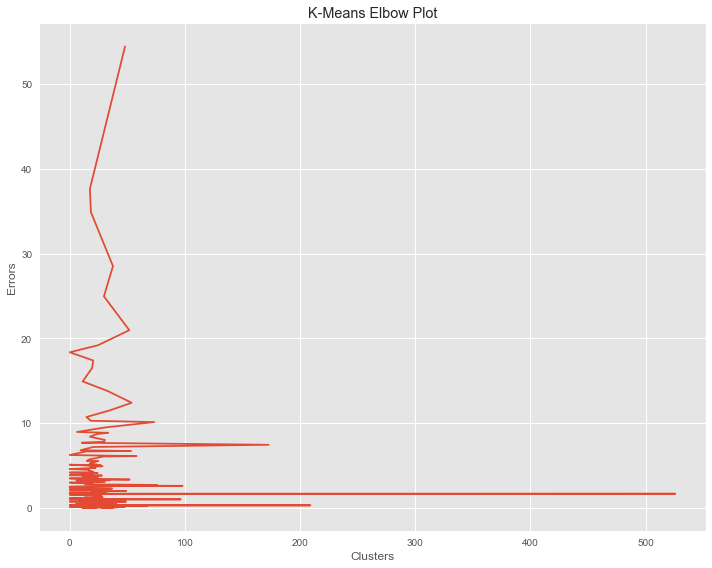

In [168]:
#Visualizing our K-Means Elbow Plot
Find_K.plot_elbow()

We can now use the above plot to set our value for K. Once we have set K, we can apply our model to our stock data and then parse out our clusters and add them back to our stockData dataframe. From here were are then able to manipulate our dataframe so that we can identify which stocks are in which cluster. Afterwards, we can select pairs of stocks and complete our analysis by checking to see if they are cointegrated and if so build out a Statistical Arbitrage strategy.

Let's finish up!

# Now Let's Use The Pairs We've Found To Build A Trading Strategy

We've covered a lot thus far and we're almost to the point we've been waiting for, coding our strategy. We're going to create a class that will allow us to clean our data, test for cointegration, and run our strategy simply by calling methods of all of our Statistical Arbitrage object.

In [216]:
class statarb(object):
    
     def __init__(self,df1, df2,ma,floor, ceiling,beta_lookback,start,end,exit_zscore=0):
        #setting the attributes of the data cleaning object
        self.df1=df1 #the complete dataframe of X
        self.df2=df2 # the comlete dataframe of Y
        self.df=pd.DataFrame(index=df1.index) #creates a new dataframe in the data_cleaning method
        self.ma=ma# the moving average period for the model
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback of beta for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        
     #create price spread
     def create_spread(self):
        
         #setting the new dataframe values for x and y of the closing 
         #prices of the two dataframes passed in
            
        self.df['X']=self.df1['Close']
        self.df['Y']=self.df2['Close']
           
        #calculating the beta of the pairs 
        self.df['cov']=pd.rolling_cov(self.df['X'],self.df['Y'],self.beta_lookback)
        self.df['var']=pd.rolling_var(self.df['Y'],self.beta_lookback)
        self.df['beta']=self.df['cov']/self.df['var']
        
        #setting the hedge ratio
        self.df['Hedge Ratio']=self.df['beta']
        
        self.df['Spread']=self.df['X']-(self.df['Hedge Ratio']*self.df['Y'])
        self.df['Spread2']=self.df['Y']-(self.df['Hedge Ratio']*self.df['X'])
            
            
        return self.df
    
     #check for cointegration
     def check_for_cointegration(self):
         coint=adfuller(self.df['Spread'].dropna())
         #writing conditional that states print out 
         #cointegrated if the t-statistic passes the 
         #critical value test
         if coint[0] < coint[4]['1%']:
             print('Spread is Cointegrated at 1% Signficance Level')
         elif coint[0] < coint[4]['5%']:
             print('Spread is Cointegrated at 5% Signficance Level')
         elif coint[0] < coint[4]['10%']:
             print('Spread is Cointegrated at the 10% Significance Level')
         else:
             print('Spread is not Cointegrated')
             
             
         return
            
     def generate_signals(self):
           
            
            #creating the z-score
            self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/
            self.df['Spread'].rolling(window=self.ma).std()
            
            #prior z-score
            self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)
            
            #Creating Buy and Sell Signals; when to be long, short, exit
            
            self.df['Long Signal']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
            self.df['Short Signal']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
            self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0
            
            #tracking our positions
            self.df['In Long']=0.0
            self.df['In Short']=0.0
            
            #variables that track if we enter market 
            self.enter_long=0
            self.enter_short=0
            
            #signal generator
            for i,value in enumerate(self.df.iterrows()):
                #longs
                if value[1]['Long Signal']==1.0:
                    self.enter_long=1
                #shorts    
                if value[1]['Short Signal']==1.0:
                    self.enter_short=1
                    
                if value[1]['Exit']==1.0:
                    
                    self.enter_long=0
                    self.enter_short=0
                    
                self.df.iloc[i]['In Long']=self.enter_long
                self.df.iloc[i]['In Short']=self.enter_short                   
            
            return self.df                    
        
     def create_returns(self, allocation,pair_name):
        
        self.allocation=allocation
        self.pair=pair_name
         
        self.portfolio=pd.DataFrame(index=self.df.index)
        self.portfolio['Positions']=self.df['Long Signal']-self.df['Short Signal']
        self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
        self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
        self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']
        
        
        #creating a percentage return stream
        self.portfolio['Returns']=self.portfolio['Total'].pct_change()
        self.portfolio['Returns'].fillna(0.0,inplace=True)
        self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
        self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)
        
        
        #calculating the mu,sigma,sharpe;wins and losses
        self.mu=(self.portfolio['Returns'].mean())
        self.sigma=(self.portfolio['Returns'].std())
        self.Sharpe=(self.mu-0.005)/self.sigma
        self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
        self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
        self.wins=self.portfolio['Win'].sum()
        self.losses=self.portfolio['Loss'].sum()
        self.total_trades=self.wins+self.losses
        
        #win loss ratio; ie hit ratio
        self.win_loss_ratio=(self.wins/self.losses)
        
        #probability of win
        self.prob_of_win=(self.wins/self.total_trades)
        #probability of loss
        self.prob_of_loss=(self.losses/self.total_trades)
        
        #average return of wins
        self.avg_win_return=(self.portfolio['Returns']>0).mean()
        #average returns of losses
        self.avg_loss_return=(self.portfolio['Returns']<0).mean()
        #calculating payout ratio
        self.payout_ratio=(self.avg_win_return/self.avg_loss_return)
        
                   
        #calculating equity curve
        self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
        self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
        self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
        self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
        self.portfolio['Initial Value']=self.allocation
        
        with plt.style.context(['bmh','seaborn-paper']):
            #Plotting Portfolio Value
            plt.plot(self.portfolio['Portfolio Value'])
            plt.plot(self.portfolio['Initial Value'])
            plt.title('StatArb Pair%s Strategy Returns %s to %s'%(self.pair,self.start,self.end))
            plt.legend(loc=0)
            plt.tight_layout()
            plt.show()               
    
        return


Let's briefly walk through what the above code does. We begin by creating an instance of our statarb class. We pass in the two dataframes of the two stocks that we want to trade along with parameters for the moving average, the floor or buy level for z-score, the ceiling, or sell level for z-score, the beta lookback period for our hedge ratio, and our exit level for our z-score. By default this level is set to 0.

Once we've create our stat arb object, we can then access its methods. We begin by cleaning our data within our create spread method, like we did earlier. Once our data has been clean, we can then call our check for cointegration method. This method will take the spread created in our create spread method and the pass it into the ADF test and return whether or not the two stocks are cointegrated. If our stocks are cointegrated, we can then call our generate signals method which will implement the Statistical Arbitrage strategy. From here we can call our create returns method. This method will require that we pass in an allocation amount. This is the amount of our hypothetical portfolio and will be used to cretae our equity curve. After our equity curve is created, we will then have access to other data such as our hit ratio, wins and losses, and our Sharpe ratio.

To implement the strategy, we must keep track of our current position while iterating over the dataframe to check for signals. For a good walk through of how to implement the Statistical Arbitrage strategy, visit Quantstart.com. The link to the article is https://www.quantstart.com/articles/Backtesting-An-Intraday-Mean-Reversion-Pairs-Strategy-Between-SPY-And-IWM . Michael does a great job providing insight into each step of the implementation.

We'll set K equal to 100. Let's begin by instantiating our K-Means object.

In [187]:
#creating an instance of the K-Means object
strategy_kmeans=KMeans(n_clusters=100)

Now let's fit our model on the features of our data

In [190]:
#fitting our model to our features
strategy_kmeans.fit(features.fillna(0))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now that we have fitted our model to our features, we can get our clusters and add them to our stockDataCopy dataframe. Also, note that we called the fillna() method on our features. This was done because we noticed that some of our features had NaN values and this can't be passed into our model. We didn't call dropna() to drop these values as this would have changed the length of our features and would present issues when adding the clusters back to our dataframe.

Let's take a look at our clusters.

In [191]:
strategy_kmeans.labels_

array([24,  4, 80, 52, 61, 81, 66, 98, 39, 49, 94, 59,  5, 31, 89, 68, 94,
       21, 89, 35, 81, 63, 99,  7,  7, 83, 14, 33, 59, 31, 52, 54, 90, 16,
       18, 18, 98, 62, 32, 64, 43, 87, 26, 47, 60,  3, 70, 45, 17, 63,  0,
       42, 47, 15,  0, 82, 32, 63, 47, 23, 41,  5, 93, 70, 61,  0, 97, 68,
       85, 85, 60, 24, 65, 77,  9, 80, 56, 97, 33, 68, 17,  5, 87, 45, 33,
       87, 54, 89, 33, 45, 72, 33, 16, 33,  5, 39, 15, 12, 44, 55, 13, 34,
       16, 70, 17, 33, 98,  6, 88, 69, 98, 61, 33, 33, 86, 26, 25, 86, 98,
        5, 47, 54, 45, 26, 59, 25, 17,  9, 63, 15, 45, 12, 68, 34, 33, 68,
       26, 18,  8,  5, 47, 23, 59, 18, 18, 18, 69, 49, 98, 52, 69, 69, 25,
       34, 38, 33, 68, 99,  8, 61, 45,  5, 45, 26, 17, 39, 54, 17,  5, 37,
       93,  5, 43, 69, 26, 95, 63, 87, 16, 10, 98, 28,  5, 38, 15, 31, 18,
       97, 58, 43, 89, 38, 16, 38, 60, 68, 75, 69, 63, 59, 47, 39, 68, 33,
       34,  1, 69, 26, 75, 33, 96, 95, 76,  0, 98, 27, 60, 68, 63, 33, 69,
       33,  8, 98, 39, 98

Okay now that we have our clusters, we can add them back to our data. Let's first take another look at our dataframe.

In [192]:
#viewing the head of our stockDataCopy dataframe
stockDataCopy.head()

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA
0,MMM,2.48,23.17,8.16,112.74,8.70
1,ABT,2.34,48.03,0.94,77.76,4.59
2,ABBV,4.04,17.55,3.63,101.52,10.95
3,ACN,1.96,18.37,6.76,77.29,5.66
4,ATVI,0.64,37.55,1.28,36.13,2.14


Let's add a column for our clusters to our dataframe.

In [194]:
stockDataCopy['Clusters']=strategy_kmeans.labels_

Let's review our dataframe once more



In [195]:
#viewing the first 10 rows of our dataframe
stockDataCopy.head(10)

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA,Clusters
0,MMM,2.48,23.17,8.16,112.74,8.7000,24
1,ABT,2.34,48.03,0.94,77.76,4.5900,4
2,ABBV,4.04,17.55,3.63,101.52,10.9500,80
3,ACN,1.96,18.37,6.76,77.29,5.6600,52
4,ATVI,0.64,37.55,1.28,36.13,2.1400,61
5,AYI,0.25,29.68,6.92,9.00,0.5862,81
6,ADBE,0.00,51.72,2.32,59.28,1.8200,66
7,AAP,0.15,24.51,6.20,11.18,1.1200,98
8,AES,4.16,NaN,-1.71,7.47,3.4200,39
9,AET,1.53,20.37,6.41,45.93,6.2000,49


Now that we have our clusters in our dataframe, our next task is to identify tradable pairs within our clusters. 

Let's take a look at how many stocks were placed in each cluster. To do this we will import the Counter method from the collections library.

In [196]:
from collections import Counter

In [197]:
#creating a variable to hold our cluster values count
cluster_counts=Counter(stockDataCopy['Clusters'])

Now that we have created a variable to count the number of symbols in each cluster, we can print it.

In [198]:
print(cluster_counts)

Counter({33: 26, 68: 21, 69: 20, 98: 20, 63: 18, 18: 17, 45: 17, 5: 16, 59: 14, 38: 13, 89: 13, 26: 12, 39: 11, 60: 11, 17: 10, 43: 10, 47: 10, 94: 10, 0: 9, 16: 9, 15: 8, 32: 8, 34: 8, 49: 8, 61: 7, 97: 7, 99: 7, 8: 6, 23: 6, 31: 6, 77: 6, 80: 6, 81: 6, 86: 6, 87: 6, 12: 5, 25: 5, 52: 5, 95: 5, 54: 4, 64: 4, 65: 4, 70: 4, 6: 3, 21: 3, 24: 3, 27: 3, 91: 3, 92: 3, 2: 2, 7: 2, 9: 2, 40: 2, 51: 2, 53: 2, 58: 2, 73: 2, 75: 2, 78: 2, 85: 2, 93: 2, 1: 1, 3: 1, 4: 1, 10: 1, 11: 1, 13: 1, 14: 1, 19: 1, 20: 1, 22: 1, 28: 1, 29: 1, 30: 1, 35: 1, 36: 1, 37: 1, 41: 1, 42: 1, 44: 1, 46: 1, 48: 1, 50: 1, 55: 1, 56: 1, 57: 1, 62: 1, 66: 1, 67: 1, 71: 1, 72: 1, 74: 1, 76: 1, 79: 1, 82: 1, 83: 1, 84: 1, 88: 1, 90: 1, 96: 1})


Now we are ready to add our clusters to our dataframe. But, notice above, when looking at how many values are in each of our cluster, we can see that some clusters only have 1 symbol. We would like to eliminate these and only view clusters that have 2 or more symbols within them. We would also like to order our data by cluster so that we can view every symbol within a respective cluster.

In [205]:
cluster_pairs_df=pd.DataFrame()
pd.concat(i for cluster_pairs, i in stockDataCopy.groupby(stockDataCopy['Clusters']) if len(i) >1)

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA,Clusters
50,AIZ,2.12,10.91,9.13,5.54,1.04000,0
54,AN,NaN,10.91,4.15,4.57,0.97070,0
65,BBBY,1.24,8.28,4.71,5.73,1.50000,0
213,GT,0.95,7.44,4.74,8.88,2.51000,0
304,KORS,NaN,8.23,4.38,5.84,1.22000,0
321,NAVI,4.29,6.86,2.12,4.23,0.00000,0
376,PVH,0.17,12.56,7.15,7.11,1.07000,0
406,SIG,1.61,9.47,6.68,4.40,0.90510,0
447,RIG,0.00,6.09,2.10,4.67,1.69000,0
323,NFLX,NaN,328.91,0.43,60.87,0.43732,2


In [256]:
test=pd.concat(i for cluster_pairs, i in stockDataCopy.groupby(stockDataCopy['Clusters']) if len(i) >1)

In [257]:
test.head()

,Symbol,Dividend Yield,P/E,EPS,MarketCap,EBITDA,Clusters
50,AIZ,2.12,10.91,9.13,5.54,1.0400,0
54,AN,NaN,10.91,4.15,4.57,0.9707,0
65,BBBY,1.24,8.28,4.71,5.73,1.5000,0
213,GT,0.95,7.44,4.74,8.88,2.5100,0
304,KORS,NaN,8.23,4.38,5.84,1.2200,0


In [258]:
unique_clusters=np.unique(test['Clusters'])

We can now see scroll or iterate through our dataframe and see which symbols are in each cluster with the minimum being atleast two symbols. Let's use our statarb method to test a pair of symbols for cointegration and develop a Statistical Arbitrage strategy.

We will begin by creating an instance of our statarb object. We will randomly select two stocks from cluster 0 for this analysis. We must first import the data for each symbol over our testing period.

In [206]:
#importing BBBY and GT stocks
bbby=pdr.get_data_yahoo('BBBY',start,end)
gt=pdr.get_data_yahoo('GT',start,end)

Now that we have imported our data, let's take a quick look at it.

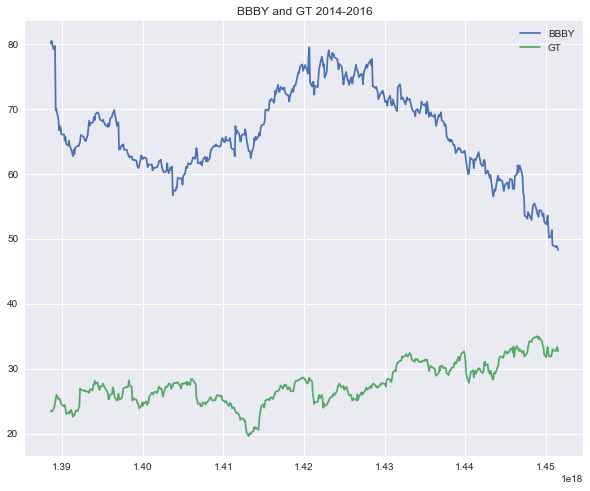

In [207]:
#plotting our data
plt.figure(figsize=(10,8))
plt.plot(bbby['Close'],label='BBBY')
plt.plot(gt['Close'],label='GT')
plt.legend(loc=0)
plt.title('BBBY and GT 2014-2016')
plt.show()

Okay now let's test our statarb class.

In [248]:
bbby_gt=statarb(bbby,gt,14,-2,2,28,start,end)

Okay in the above line of code, we have just created an instance of our statarb strategy class. We can now call our create_spread method to create the spread of our data. We passed in the entire dataframes of bbby and gt because this method will parse the closing prices and created the spread for us. Afterwards we can call the remaining methods to complete our Statistical Arbitrage analysis.

In [249]:
#calling the create spread method on our object
bbby_gt.create_spread()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=28).var()


,X,Y,cov,var,beta,Hedge Ratio,Spread,Spread2
Date,,,,,,,,
2014-01-02,80.029999,23.530001,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,80.480003,23.370001,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,79.150002,23.760000,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,79.209999,24.049999,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,79.680000,24.709999,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09,69.750000,25.219999,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10,69.940002,25.990000,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-13,68.300003,25.330000,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-14,66.690002,25.420000,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have created the spread of our pair, let's check to see if they are cointegrated.

In [250]:
#checking to see if our pair is cointegrated
bbby_gt.check_for_cointegration()

Spread is Cointegrated at 1% Signficance Level


Our pair is highly cointegrated. Now that we have confirmed this, we can call our generate signals and create returns to see how our strategy would have performed over our testing period.

In [251]:
#generating signals for our strategy
bbby_gt.generate_signals()

,X,Y,cov,var,beta,Hedge Ratio,Spread,Spread2,Z-Score,Prior Z-Score,Long Signal,Short Signal,Exit,In Long,In Short
Date,,,,,,,,,,,,,,,
2014-01-02,80.029999,23.530001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-03,80.480003,23.370001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-06,79.150002,23.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-07,79.209999,24.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-08,79.680000,24.709999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-09,69.750000,25.219999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-10,69.940002,25.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-13,68.300003,25.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2014-01-14,66.690002,25.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


Now that we have generated signals for our pair, let's use our create returns method to calculate our returns and print our equity curve. Recall that this method takes in an allocation amount. This is the starting value for our portfolio. This method also requires that we pass in a name for our pair as a string to be included in our plot.

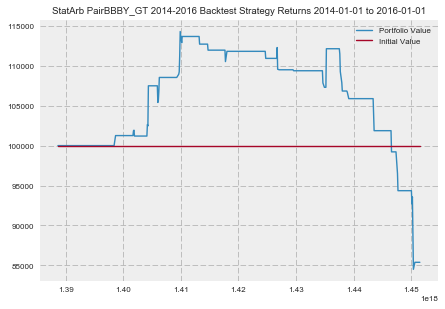

In [252]:
#creating our strategy returns
bbby_gt.create_returns(100000,'BBBY_GT 2014-2016 Backtest')

We can see that our strategy did well for a while before appearing to no longer be cointegrated. Let's take a look our Sharpe Ratio.

In [254]:
#checking Sharpe of our strategy
bbby_gt.Sharpe

-0.9060799218326157

# Challenge: See If You Can Improve This Strategy

Try your hand at improving this strategy. Our analysis showed that these two stocks were highly cointegrated. However, after performing well for the majority of our testing period, the strategy appears to have loss cointegration. This shows a couple of things. First it shows that Statistical Arbitrage is not a riskless trading strategy. Secondly, it underscores the importance of the parameters used when trading. These are what are truly proprietary. 

# Recap

Wow! We have covered an immense amout of information in a short period of time. To recap, we began by gaining an understanding of K-Means. We created our own toy data in which we initialized our own clusters. We then applied K-Means to our toy data to see if it would be able to identify the clusters that we created.


Next we took a walk through a Statistical Arbitrage world without K-Means. We brute forced the creation of a couple of pairs and learned that identifying tradeable relationships involved a little more than finding pairs in the same sector. We then used real stock data from the S&P 500, namely Dividend Yields, P/E, MarketCap, EPS and EBITDA, as features to begin creating a real world K-Means analysis for trading Statisical Arbitrage.

We then added our clusters to our dataframe and manipulated it so that we could test the pairs in each cluster for cointegration via the ADF test. We randomly selected BBBY and GT from cluster 0 of our analysis and found that they were cointegrated at the 99% significance level. Afterwards, we used the statarb class we created to backtest our new found pair. Whew!

This analysis also showed the strength of K-Means for finding non-traditional pairs for trading Statistical Arbitrage. BBBY is the ticker symbol of Bed Bath and Beyond and GT is the ticker symbol for Goodyear Tire & Rubber Co. These two stocks appear to have nothing in common on the surface, but have been cointegrated at the 1% significance level in the past.